<a href="https://colab.research.google.com/github/ayushrathod04/MACHINE_LEARNING/blob/main/intershipday5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
cred_df=pd.read_csv('/content/creditcard.csv')

In [ ]:
cred_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
cred_df['Class'].value_counts()

Class
0.0    17836
1.0       81
Name: count, dtype: int64

In [ ]:
legit=cred_df[cred_df.Class==0.0]
fraud=cred_df[cred_df.Class==1.0]

In [ ]:
print(legit.shape)

(17836, 31)


In [ ]:
legit_sample=legit.sample(n=500)

In [ ]:
print(legit_sample.shape)

(500, 31)


In [ ]:
creddf_new=pd.concat([legit_sample,fraud],axis=0)

In [ ]:
print(creddf_new.head)

<bound method NDFrame.head of         Time         V1         V2         V3        V4         V5        V6  \
5945    6579  -2.307051  -0.529277   1.941096  1.689664   0.038983 -0.725500   
2981    2529  -2.517158   2.409525  -0.035277  0.890519  -0.934679 -0.963917   
7203    9444   1.172801   0.631673   0.625903  1.980214  -0.033528 -0.661892   
6261    7348  -1.105168   0.091473   3.387833  0.583496   0.076593 -0.663443   
7652   10600   1.101485   0.380341   1.670211  2.918697  -0.668605  0.221687   
...      ...        ...        ...        ...       ...        ...       ...   
17317  28625 -27.848181  15.598193 -28.923756  6.418442 -20.346228 -4.828202   
17366  28658 -28.524268  15.876923 -29.468732  6.447591 -20.786000 -4.865613   
17407  28692 -29.200329  16.155701 -30.013712  6.476731 -21.225810 -4.902997   
17453  28726 -29.876366  16.434525 -30.558697  6.505862 -21.665654 -4.940356   
17480  28755 -30.552380  16.713389 -31.103685  6.534984 -22.105532 -4.977692   

         

In [ ]:
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/train - train.csv')
train_df.head()


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
train_df.shape

(20800, 5)

In [ ]:
train_df.isnull().sum()

id           0
title      558
author    1957
text       143
label        0
dtype: int64

In [ ]:
train_df=train_df.fillna('')

In [ ]:
train_df['content'] = train_df['author'] + ' ' + train_df['title']


In [ ]:
x=train_df.drop()

In [ ]:
from nltk.stem import PorterStemmer

import re
from nltk.stem import PorterStemmer

# Initialize the PorterStemmer
port_stem = PorterStemmer()

def stemming(content):
    # Remove non-alphabetic characters
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    # Convert to lowercase
    stemmed_content = stemmed_content.lower()
    # Split into words
    stemmed_content = stemmed_content.split()
    # Stem each word
    stemmed_content = [port_stem.stem(word) for word in stemmed_content]
    # Join the stemmed words back into a single string
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

# Example usage
content = "Running runners run, and they have been running."
print(stemming(content))  # Outputs: run runner run and they have been run


run runner run and they have been run


In [ ]:
# Assuming train_df is your DataFrame and you have already imported pandas as pd

# Apply the stemming function to the 'content' column
train_df['stemmed_content'] = train_df['content'].apply(stemming)


In [ ]:
x=train_df['content'].values
y=train_df['label'].values

In [ ]:
print(x)

['Darrell Lucus House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'
 'Daniel J. Flynn FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'
 'Consortiumnews.com Why the Truth Might Get You Fired' ...
 'Michael J. de la Merced and Rachel Abrams Macy’s Is Said to Receive Takeover Approach by Hudson’s Bay - The New York Times'
 'Alex Ansary NATO, Russia To Hold Parallel Exercises In Balkans'
 'David Swanson What Keeps the F-35 Alive']


In [ ]:
print(y)

[1 0 1 ... 0 1 1]


In [ ]:
np.vectorizer=TfidfVectorizer()

In [ ]:
print(x)

['Darrell Lucus House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'
 'Daniel J. Flynn FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'
 'Consortiumnews.com Why the Truth Might Get You Fired' ...
 'Michael J. de la Merced and Rachel Abrams Macy’s Is Said to Receive Takeover Approach by Hudson’s Bay - The New York Times'
 'Alex Ansary NATO, Russia To Hold Parallel Exercises In Balkans'
 'David Swanson What Keeps the F-35 Alive']


task1

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df=pd.read_csv('/content/Most Streamed Spotify Songs 2024 - Most Streamed Spotify Songs 2024.csv')

In [ ]:
df.head()

,Track_name,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"39,04,70,936","30,716","19,66,31,588",...,684,62.0,"1,75,98,718",114.0,"1,80,04,655","22,931","48,18,457","26,69,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,05-04-2024,USUG12400910,2,545.9,"32,37,03,884","28,113","17,45,97,137",...,3,67.0,"1,04,22,430",111.0,"77,80,028","28,444","66,23,075","11,18,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"60,13,09,283","54,331","21,16,07,669",...,536,136.0,"3,63,21,847",172.0,"50,22,621","5,639","72,08,651","52,85,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,01-12-2023,USSM12209777,4,444.9,"2,03,12,80,633","2,69,802","13,65,69,078",...,"2,182",264.0,"2,46,84,248",210.0,"19,02,60,277","2,03,384",NaN,"1,18,22,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"10,70,34,922","7,223","15,14,69,874",...,1,82.0,"1,76,60,624",105.0,"44,93,884","7,006","2,07,179","4,57,017",NaN,1


In [ ]:
#Explicit Track
df['Track'] = df['title'] + " " + df['Album Name']

In [ ]:
X = df.drop(columns=['Track', 'Album Name', 'Explicit Track'])

In [ ]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [ ]:
y= df['Explicit Track']

In [ ]:
import pandas as pd
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load the dataset

data = pd.read_csv('/content/Most Streamed Spotify Songs 2024 - Most Streamed Spotify Songs 2024.csv')

# Initialize the Snowball stemmer
stemmer = SnowballStemmer("english")

# Function to stem the words in a track name using Snowball stemmer
def stem_words(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Apply the stemming function to the 'Track_name' column
data['Stemmed_Track_name'] = data['Track_name'].apply(stem_words)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Apply TF-IDF to the stemmed track names
X = tfidf_vectorizer.fit_transform(data['Stemmed_Track_name'])

# Extract the target variable
y = data['Explicit Track']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of X_train and X_test to verify
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(3680, 4731) (920, 4731) (3680,) (920,)


In [ ]:
data.head()

,Track_name,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Stemmed_Track_name
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"39,04,70,936","30,716","19,66,31,588",...,62.0,"1,75,98,718",114.0,"1,80,04,655","22,931","48,18,457","26,69,262",NaN,0,million dollar babi
1,Not Like Us,Not Like Us,Kendrick Lamar,05-04-2024,USUG12400910,2,545.9,"32,37,03,884","28,113","17,45,97,137",...,67.0,"1,04,22,430",111.0,"77,80,028","28,444","66,23,075","11,18,279",NaN,1,not like us
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"60,13,09,283","54,331","21,16,07,669",...,136.0,"3,63,21,847",172.0,"50,22,621","5,639","72,08,651","52,85,340",NaN,0,i like the way you kiss me
3,Flowers,Flowers - Single,Miley Cyrus,01-12-2023,USSM12209777,4,444.9,"2,03,12,80,633","2,69,802","13,65,69,078",...,264.0,"2,46,84,248",210.0,"19,02,60,277","2,03,384",NaN,"1,18,22,942",NaN,0,flower
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"10,70,34,922","7,223","15,14,69,874",...,82.0,"1,76,60,624",105.0,"44,93,884","7,006","2,07,179","4,57,017",NaN,1,houdini


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data=pd.read_csv('/content/fictional_character_battles_complex - fictional_character_battles_complex.csv')

In [ ]:
data.head()

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome
0,Wonder Woman,Marvel,7,8,3,Telekinesis,Kryptonite,0
1,Iron Man,Marvel,4,7,9,Telekinesis,Kryptonite,0
2,Iron Man,DC Comics,8,7,5,Telekinesis,Magic,0
3,Spider-Man,DC Comics,5,6,10,Telekinesis,Kryptonite,0
4,Flash,Marvel,7,6,2,Invisibility,Magic,0


In [ ]:
data = {
    'Character': ['Spider-Man', 'Iron Man', 'Captain America', 'Thor', 'Batman', 'Superman', 'Wonder Woman', 'Flash'],
    'Universe': ['Marvel', 'Marvel', 'Marvel', 'Marvel', 'DC Comics', 'DC Comics', 'DC Comics', 'DC Comics'],
    'Strength': [7, 6, 8, 9, 6, 10, 7, 6],
    'Speed': [8, 7, 6, 7, 8, 9, 7, 9],
    'Intelligence': [7, 9, 8, 6, 10, 8, 9, 7],
    'Special Abilities': ['Super Strength', 'Flight', 'Super Strength', 'Telekinesis', 'Super Strength', 'Flight', 'Invisibility', 'Super Strength'],
    'Weaknesses': ['None', 'None', 'None', 'None', 'Kryptonite', 'Magic', 'Magic', 'None'],
    'Battle Outcome': [1, 0, 1, 0, 1, 0, 1, 0]
}

In [ ]:
df = pd.DataFrame(data)

# Define feature columns and target
feature_columns = ['Character', 'Universe', 'Strength', 'Speed', 'Intelligence', 'Special Abilities', 'Weaknesses']
target_column = 'Battle Outcome'


task2

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer, PowerTransformer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from scipy.stats import shapiro, ttest_ind, f_oneway

In [ ]:
df=pd.read_csv('/content/fictional_character_battles_complex - fictional_character_battles_complex.csv')

In [ ]:
df.head()

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome
0,Wonder Woman,Marvel,7,8,3,Telekinesis,Kryptonite,0
1,Iron Man,Marvel,4,7,9,Telekinesis,Kryptonite,0
2,Iron Man,DC Comics,8,7,5,Telekinesis,Magic,0
3,Spider-Man,DC Comics,5,6,10,Telekinesis,Kryptonite,0
4,Flash,Marvel,7,6,2,Invisibility,Magic,0


In [ ]:
df.isnull().sum()

Character           0
Universe            0
Strength            0
Speed               0
Intelligence        0
SpecialAbilities    0
Weaknesses          0
BattleOutcome       0
dtype: int64

In [ ]:
# Check for duplicates and remove them
duplicates = df.duplicated()
print("\nNumber of Duplicates:", duplicates.sum())


Number of Duplicates: 6


In [ ]:
df = df.drop_duplicates()

In [ ]:
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 2345 entries, 0 to 2350
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Character         2345 non-null   object
 1   Universe          2345 non-null   object
 2   Strength          2345 non-null   int64 
 3   Speed             2345 non-null   int64 
 4   Intelligence      2345 non-null   int64 
 5   SpecialAbilities  2345 non-null   object
 6   Weaknesses        2345 non-null   object
 7   BattleOutcome     2345 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 164.9+ KB


In [ ]:
print("\nData Description:\n", df.describe())


Data Description:
           Strength        Speed  Intelligence  BattleOutcome
count  2345.000000  2345.000000   2345.000000    2345.000000
mean      5.441365     5.481450      5.550107       0.278038
std       2.896110     2.858841      2.861892       0.448128
min       1.000000     1.000000      1.000000       0.000000
25%       3.000000     3.000000      3.000000       0.000000
50%       5.000000     6.000000      6.000000       0.000000
75%       8.000000     8.000000      8.000000       1.000000
max      10.000000    10.000000     10.000000       1.000000


In [ ]:
# Calculate IQR
Q1 = df[['Strength', 'Speed', 'Intelligence']].quantile(0.25)
Q3 = df[['Strength', 'Speed', 'Intelligence']].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df = df[~((df[['Strength', 'Speed', 'Intelligence']] < (Q1 - 1.5 * IQR)) | (df[['Strength', 'Speed', 'Intelligence']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
for column in ['Strength', 'Speed', 'Intelligence']:
    qt = QuantileTransformer()
    df[[column]] = qt.fit_transform(df[[column]])

    # Check normalization with Shapiro-Wilk test
    stat, p = shapiro(df[column])
    print(f'\nShapiro-Wilk Test for {column}: Statistics=%.3f, p=%.3f' % (stat, p))

    if p < 0.05:
        # Apply Power Transformer if not normally distributed
        pt = PowerTransformer()
        df[[column]] = pt.fit_transform(df[[column]])


Shapiro-Wilk Test for Strength: Statistics=0.947, p=0.000

Shapiro-Wilk Test for Speed: Statistics=0.948, p=0.000

Shapiro-Wilk Test for Intelligence: Statistics=0.948, p=0.000


In [ ]:
t_stat, t_p = ttest_ind(df[df['Universe'] == 'Marvel']['Strength'], df[df['Universe'] == 'DC Comics']['Strength'])
print('\nT-test: t=%.3f, p=%.3f' % (t_stat, t_p))


T-test: t=1.512, p=0.131


In [ ]:
print("\n--- T-tests ---")
t_test_results = []
for col1 in ['Strength', 'Speed', 'Intelligence']:
    for col2 in ['Strength', 'Speed', 'Intelligence']:
        if col1 != col2:
            t_stat, t_p = ttest_ind(df[col1], df[col2])
            t_test_results.append({
                'Comparison': f'{col1} vs {col2}',
                'T Statistic': t_stat,
                'p-value': t_p
            })
            print(f'T-test between {col1} and {col2}: t-statistic={t_stat:.3f}, p-value={t_p:.3f}')


--- T-tests ---
T-test between Strength and Speed: t-statistic=-0.000, p-value=1.000
T-test between Strength and Intelligence: t-statistic=0.000, p-value=1.000
T-test between Speed and Strength: t-statistic=0.000, p-value=1.000
T-test between Speed and Intelligence: t-statistic=0.000, p-value=1.000
T-test between Intelligence and Strength: t-statistic=-0.000, p-value=1.000
T-test between Intelligence and Speed: t-statistic=-0.000, p-value=1.000


In [ ]:
print("\n--- ANOVA ---")
anova_results = {}
anova_stat, anova_p = f_oneway(df['Strength'], df['Speed'], df['Intelligence'])
anova_results['ANOVA'] = {
    'F-statistic': anova_stat,
    'p-value': anova_p
}
print(f'ANOVA: F-statistic={anova_stat:.3f}, p-value={anova_p:.3f}')


--- ANOVA ---
ANOVA: F-statistic=0.000, p-value=1.000


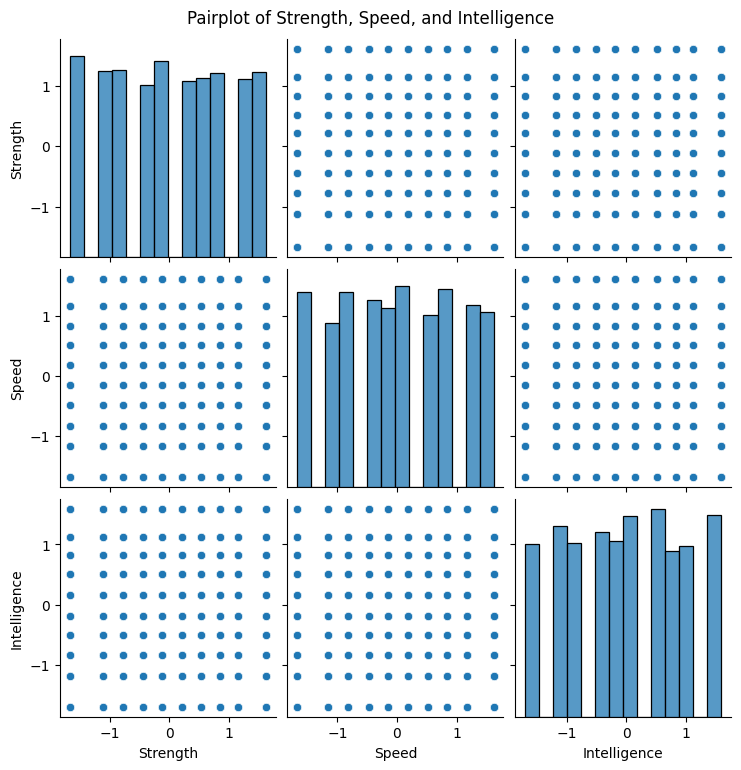

In [ ]:
sns.pairplot(df[['Strength', 'Speed', 'Intelligence']])
plt.suptitle("Pairplot of Strength, Speed, and Intelligence", y=1.02)
plt.show()

task1

In [ ]:

import numpy as np
# pandas, for storing & manipulating data in nice tables
import pandas as pd
# matplotlib, for plotting graphs
import matplotlib.pyplot as plt
# seaborn, a nice wrapper for some more graphs
import seaborn as sns


In [ ]:
spotfiy_data=pd.read_csv('/content/Most Streamed Spotify Songs 2024 - Most Streamed Spotify Songs 2024.csv')
spotfiy_data.head()

,Track_name,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"39,04,70,936","30,716","19,66,31,588",...,684,62.0,"1,75,98,718",114.0,"1,80,04,655","22,931","48,18,457","26,69,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,05-04-2024,USUG12400910,2,545.9,"32,37,03,884","28,113","17,45,97,137",...,3,67.0,"1,04,22,430",111.0,"77,80,028","28,444","66,23,075","11,18,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"60,13,09,283","54,331","21,16,07,669",...,536,136.0,"3,63,21,847",172.0,"50,22,621","5,639","72,08,651","52,85,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,01-12-2023,USSM12209777,4,444.9,"2,03,12,80,633","2,69,802","13,65,69,078",...,"2,182",264.0,"2,46,84,248",210.0,"19,02,60,277","2,03,384",NaN,"1,18,22,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"10,70,34,922","7,223","15,14,69,874",...,1,82.0,"1,76,60,624",105.0,"44,93,884","7,006","2,07,179","4,57,017",NaN,1


In [ ]:
spotfiy_data.shape

(4600, 29)

In [ ]:
spotfiy_data.groupby(['Track_name', 'Artist']).count()

,,Album Name,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
Track_name,Artist,,,,,,,,,,,,,,,,,,,,,
"""Slut!"" (Taylor's Version) (From The Vault)",Taylor Swift,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,0,1,0,1
"""ıııııı ıııııııııı ""ıııııııııııı ıııı ıııııııııııı",Myriam Fares,1,1,1,1,1,1,1,1,1,1,...,0,1,1,0,0,0,0,1,0,1
#BrooklynBloodPop!,SyKo,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,1,1,0,1
(It Goes Like) Nanana - Edit,Peggy Gou,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,0,1
"...And to Those I Love, Thanks for Sticking Around",$uicideboy$,1,1,1,1,1,1,1,1,1,1,...,0,1,1,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ıııııııııııııııııııııııııııııııııııııııııııııııııııııı,ııııııııı ııııııııııııııııııııı,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
ıııııııııııııııııııııııııııııııııııııııııııııııııııııııııııı (Fade),Jeff Satur,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,1
ıııııııııııııııııııııııııııııııııııııııııııııııııııııııııııııııııı,Djpaoremix,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
spotfiy_data = spotfiy_data.groupby(['Track_name', 'Artist']).first().reset_index()
spotfiy_data.shape

(4483, 29)

In [ ]:
X = spotfiy_data.drop('Track_name', axis=1)
y = spotfiy_data['Track_name']

In [ ]:
spotfiy_data.head()

,Track_name,Artist,Album Name,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,"""Slut!"" (Taylor's Version) (From The Vault)",Taylor Swift,1989 (Taylor's Version),10/26/2023,USUG12306687,"2,908",25.9,"26,59,32,119","15,133","2,15,22,387",...,5,19.0,"5,12,287",33.0,"26,49,309","1,180",None,"3,62,874",NaN,0
1,"""ıııııı ıııııııııı ""ıııııııııııı ıııı ıııııııı...",Myriam Fares,"""ıııııı ıııııııııı ""ıııııııııııı ıııı ıııııııı...",03-10-2022,FR10S2273417,"4,310",20.3,"73,83,901","4,008","5,39,281",...,None,1.0,339,NaN,None,None,None,"2,99,561",NaN,0
2,#BrooklynBloodPop!,SyKo,#BrooklynBloodPop!,7/27/2020,QZK6Q2049800,"2,230",30.3,"28,90,85,486","76,485","88,76,090",...,None,NaN,None,2.0,"33,62,791","11,273","2,64,657","44,23,775",NaN,1
3,(It Goes Like) Nanana - Edit,Peggy Gou,(It Goes Like) Nanana [Edit],6/15/2023,GBBKS2300080,105,150.4,"46,01,56,070","1,63,449","12,78,27,271",...,None,102.0,"30,34,022",111.0,"11,32,923","1,312","94,51,176","92,79,625",NaN,0
4,"...And to Those I Love, Thanks for Sticking Ar...",$uicideboy$,STOP STARING AT THE SHADOWS,2/14/2020,QZAPK1900020,"1,709",35.3,"67,50,82,623","1,67,727","1,51,98,984",...,None,5.0,"22,406",NaN,"1,17,46,442","31,117",None,"31,95,912",NaN,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

print("Training set size:", y_train.shape)
print("Test set size:", y_test.shape)

NameError: name 'X' is not defined